In [179]:
from sklearn import linear_model, metrics 
from sklearn.model_selection import train_test_split 
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import sklearn.metrics as metrics
import plotly.graph_objs as go
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
%matplotlib inline
sns.set()

import warnings                                  
warnings.filterwarnings('ignore')


In [180]:
df = pd.read_csv("stock.csv")
df['Date'] = pd.to_datetime(df['Date'])                     
df = df.set_index('Date')                                     #Setting date column as index
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,NaN,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,NaN,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [181]:
df.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,NaN,153.00,151.50,152.50,2990583,IBM
2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM
2017-12-29,154.17,154.72,153.42,NaN,3327087,IBM


# **Data Cleaning**

In [182]:
drop_list = ['Name']                                     #Droping columns that are not required
df.drop(drop_list, axis=1,inplace = True)

In [183]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,NaN,82.55,80.81,82.06,11715200
2006-01-04,82.20,82.50,81.33,81.95,9840600
2006-01-05,81.40,82.90,81.00,NaN,7213500
2006-01-06,83.95,85.03,83.41,84.95,8197400
2006-01-09,84.10,84.25,83.38,83.73,6858200


In [184]:
print(df.isnull())
df.isnull().sum()

             Open   High    Low  Close  Volume
Date                                          
2006-01-03   True  False  False  False   False
2006-01-04  False  False  False  False   False
2006-01-05  False  False  False   True   False
2006-01-06  False  False  False  False   False
2006-01-09  False  False  False  False   False
...           ...    ...    ...    ...     ...
2017-12-22   True  False  False  False   False
2017-12-26  False  False  False  False   False
2017-12-27  False  False  False  False   False
2017-12-28  False  False  False  False   False
2017-12-29  False  False  False   True   False

[3025 rows x 5 columns]


Open      8
High      4
Low       4
Close     7
Volume    0
dtype: int64

In [185]:
#Replacing all null values with the mean all values

df["Open"].fillna(df["Open"].mean(), inplace = True)
df["Close"].fillna(df["Close"].mean(), inplace = True)
df["High"].fillna(df["High"].mean(), inplace = True)
df["Low"].fillna(df["Low"].mean(), inplace = True)
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3025 entries, 2006-01-03 to 2017-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3025 non-null   float64
 1   High    3025 non-null   float64
 2   Low     3025 non-null   float64
 3   Close   3025 non-null   float64
 4   Volume  3025 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 141.8 KB


In [187]:
print("No.of Duplicates = ",df.duplicated().sum())

No.of Duplicates =  5


In [188]:
#Removing duplicate data

df.drop_duplicates(inplace=True)
print("No.of Duplicates = ",df.duplicated().sum())

No.of Duplicates =  0


# **Exploratory Data Analysis**

In [189]:
df.nunique()                                     #Unique values present in each column

Open      2608
High      2603
Low       2588
Close     2657
Volume    3020
dtype: int64

An OHLC chart shows the open, high, low, and close price for a given period.
The vertical line represents the high and low for the period, while the line to the left is for the open price and the line to the right is for the closing price. 

In [190]:
hover=[]                                     #Shows OHLC values when we hover on the chart
for i in range(len(df['Open'])):
    hover.append('Open: '+str(df['Open'][i])+'<br>Close: '+str(df['Close'][i])+'<br>High: '+str(df['High'][i])+'<br>Low: '+str(df['Low'][i]))

chart = go.Ohlc(x=df.index, open=df.Open, high=df.High, low=df.Low, close=df.Close,increasing_line_color= 'blue', decreasing_line_color= 'red', text=hover,hoverinfo='text')
fig = go.Figure(chart)
fig.update_layout(title='Open-High-Low-Close Analysis',yaxis_title='Stock', xaxis_title='Year')
fig.show()

Autocorrelation plot of Volume of the stocks



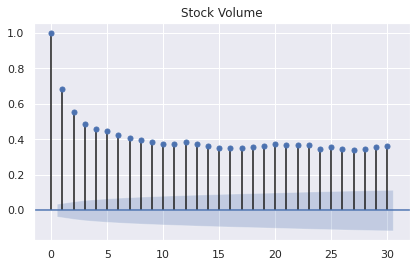

In [191]:
plot_acf(df["Volume"],lags=30,title="Stock Volume")
plt.show()

Histograms for each column

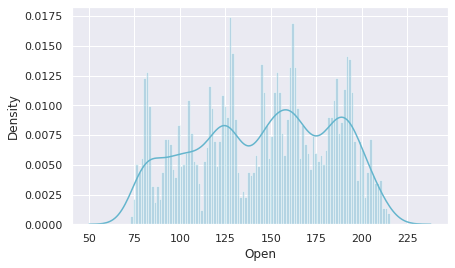

In [192]:
sns.distplot(df['Open'],color='c',bins=100, hist_kws={"alpha":0.4})

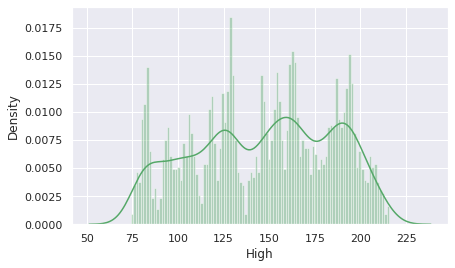

In [193]:
sns.distplot(df['High'],color='g',bins=100, hist_kws={"alpha":0.4})

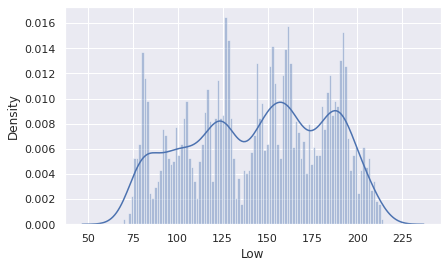

In [194]:
sns.distplot(df['Low'],color='b',bins=100, hist_kws={"alpha":0.4})

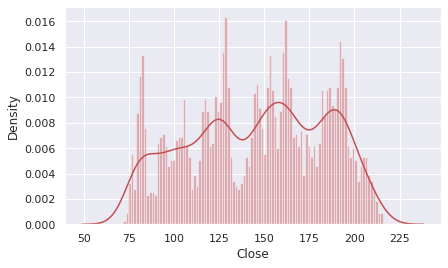

In [195]:
sns.distplot(df['Close'],color='r',bins=100, hist_kws={"alpha":0.4})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f090b3c4a20>,
      dtype=object)

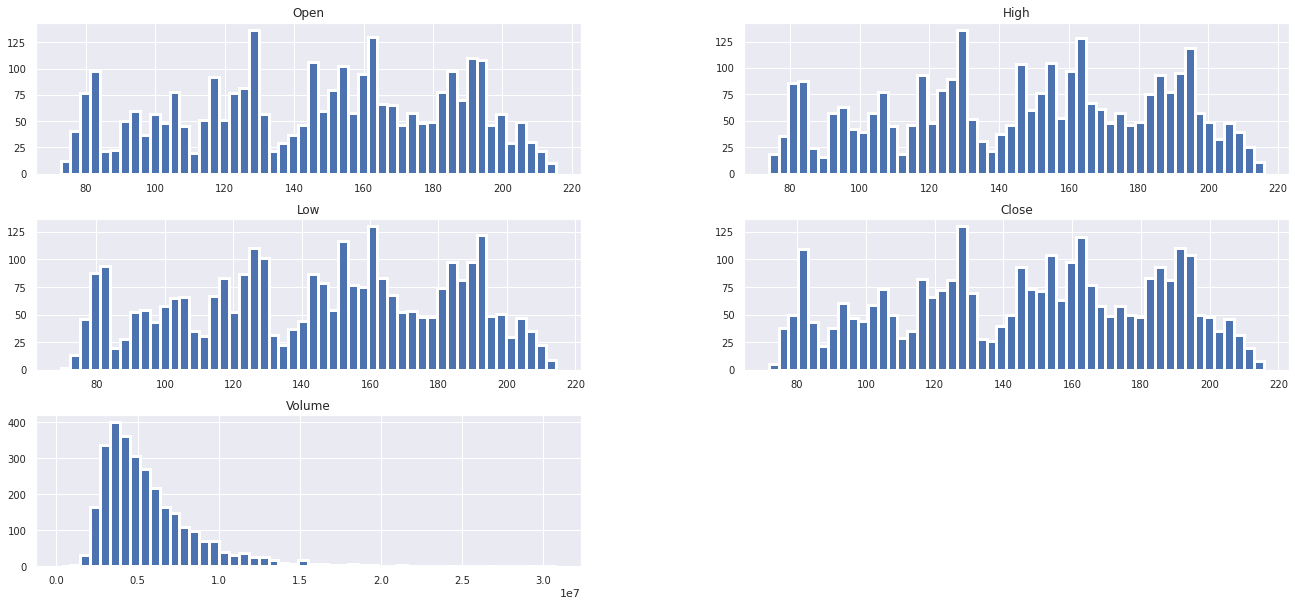

In [196]:
df.hist(figsize=(20,10), bins=50, linewidth=3, xlabelsize=10, ylabelsize=10)

Correlation - using a heatmap  

           Open      High       Low     Close
Open   1.000000  0.995657  0.995758  0.994014
High   0.995657  1.000000  0.996957  0.995752
Low    0.995758  0.996957  1.000000  0.995881
Close  0.994014  0.995752  0.995881  1.000000 




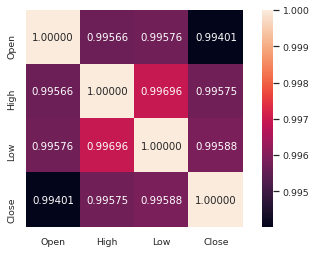

In [197]:
c=df.drop(['Volume'], axis = 1)
r = c.corr()
print(r,"\n\n")
sns.set(font_scale=0.85)
sns.heatmap(r, xticklabels=r.columns, yticklabels=r.columns, cbar=True, annot=True, square=True, fmt='.5f')


# **Regression Analysis**

Predicting Close price values when open high low and close values are known.

In [198]:
x = df.drop(['Close'], axis = 1)
y = df['Close']

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.4, random_state=1) 

Rmodel = linear_model.LinearRegression() 

Rmodel.fit(trainX, trainY) 

print('Coefficients: ', Rmodel.coef_ ,'\n') 

print('Variance score: {}'.format(Rmodel.score(testX, testY))) 

Coefficients:  [ 2.88541180e-01  3.04864602e-01  4.04361412e-01 -5.02811592e-09] 

Variance score: 0.9903568587325864


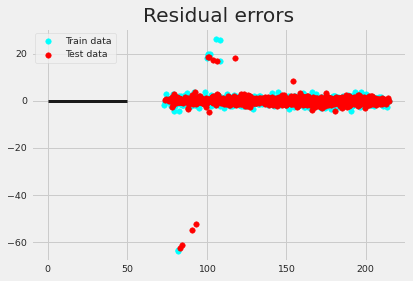

In [199]:
plt.style.use('fivethirtyeight') 
plt.scatter(Rmodel.predict(trainX), Rmodel.predict(trainX) - trainY, color = "cyan", s = 30, label = 'Train data') 
plt.scatter(Rmodel.predict(testX), Rmodel.predict(testX) - testY, color = "red", s = 30, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 3) 
plt.legend(loc = 'upper left') 
plt.title("Residual errors") 
plt.show() 

In [200]:
print("Mean absolute error =", round(metrics.mean_absolute_error(testY, Rmodel.predict(testX)), 2)) 
print("Mean squared error =", round(metrics.mean_squared_error(testY, Rmodel.predict(testX)), 2)) 
print("R2 score =", round(metrics.r2_score(testY, Rmodel.predict(testX)), 2))

Mean absolute error = 0.99
Mean squared error = 13.38
R2 score = 0.99


R2 score - 0.99 means model's prediction is 99% accurate.

In [201]:
diff = abs(testY - Rmodel.predict(testX))

compare = pd.DataFrame({'Actual Close Price': testY, 'Predicted Close Price' : Rmodel.predict(testX), 'Difference in price' : diff})
compare.head()

,Actual Close Price,Predicted Close Price,Difference in price
Date,,,
2010-05-24,124.45,125.206612,0.756612
2010-06-08,123.72,123.941503,0.221503
2016-10-18,150.72,149.540354,1.179646
2013-10-03,183.86,184.185790,0.325790
2010-04-01,128.25,128.703172,0.453172


# **Time Series Modeling - (ARIMA Model)**

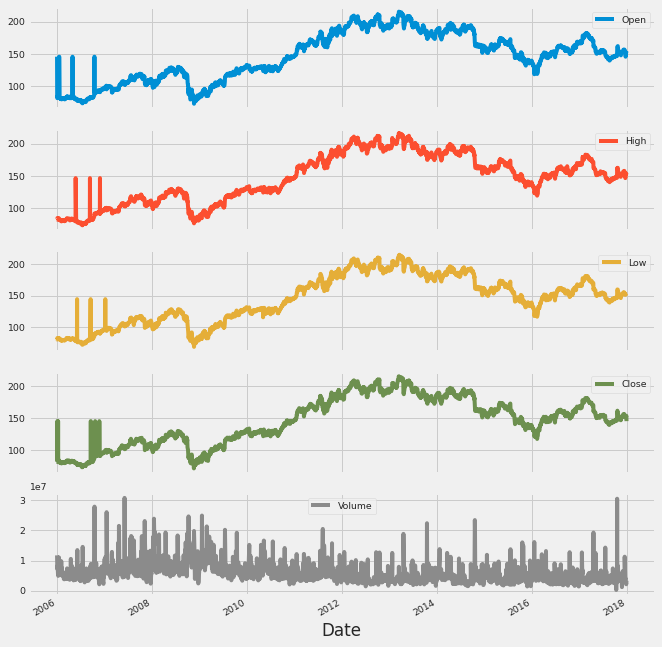

In [202]:
df.plot(subplots=True, figsize=(10,12))
plt.show()

ARIMA is a statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. 

In [203]:
training, testing = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
train = training['Close'].values
test = testing['Close'].values
h = [x for x in train]
predVal = []
for t in range(len(test)):
    Amodel = ARIMA(h, order=(4,1,0))
    model_fit = Amodel.fit(disp=0)
    out = model_fit.forecast()
    predVal.append(out[0])
    h.append(test[t])
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3018
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -8109.823
Method:                       css-mle   S.D. of innovations              3.554
Date:                Sun, 29 Nov 2020   AIC                          16231.647
Time:                        19:29:18   BIC                          16267.721
Sample:                             1   HQIC                         16244.619
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0205      0.037      0.552      0.581      -0.052       0.093
ar.L1.D.y     -0.3787      0.018    -20.849      0.000      -0.414      -0.343
ar.L2.D.y     -0.2597      0.020    -13.213      0.0

In [204]:
print("Mean squared error =", round(metrics.mean_squared_error(test, predVal), 2)) 
print("Mean absolute error =", round(metrics.mean_absolute_error(test, predVal), 2)) 
f_error = [test[i]-predVal[i] for i in range(len(test))]
bias = sum(f_error) * 1.0/len(test)
print('Forecast Bias = %f' % bias)
print("{Negative value means its an Over-forecast - it is more than the actual}")

Mean squared error = 4.44
Mean absolute error = 1.45
Forecast Bias = -0.118834
{Negative value means its an Over-forecast - it is more than the actual}


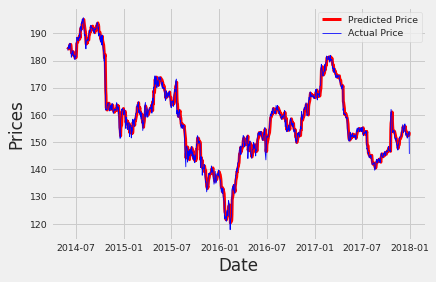

In [205]:
range = df[int(len(df)*0.7):].index
plt.plot(range, predVal, color='red', label='Predicted Price',lw=3)
plt.plot(range, test, color='blue', label='Actual Price',lw=0.8)
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

# **Statistical Hypothesis Testing - (T-Test Hypothesis Testing)**

In [206]:
ttest, pval = stats.ttest_1samp(df['Close'], 155)
if pval < 0.05:   
   print(" Null hypothesis rejected! \n\n So, It is 'Likely' that the Close price values fall around 155.")
else:
  print("Null hypothesis accepted! \n So, It is 'Uikely' that the Close price values fall around 155.")

 Null hypothesis rejected! 

 So, It is 'Likely' that the Close price values fall around 155.


In [207]:
ttest,pval = stats.ttest_rel(test, predVal)
if pval.all()<0.05:
    print(" Null hypothesis rejected! \n\n So, It is 'Likely' that the predicted values are almost closer to the actual values.")
else:
    print(" Null hypothesis accepted! \n\n So, It is 'Unlikely' that the predicted values are almost closer to the actual values.")

 Null hypothesis rejected! 

 So, It is 'Likely' that the predicted values are almost closer to the actual values.


# **Question : 3**
# I have done a course - "AWS Machine Learning" - in Coursera. As such I haven't done any project related to it. I have a little idea about AWS concepts.